In [51]:
# testing binned statistic 2D


In [22]:
import h5py
import numpy as np
from pyCXD.detector.eiger import EigerImages
from skimage.restoration import inpaint
import scipy

from skbeam.core.utils import radial_grid, angle_grid

from matplotlib.pyplot import figure, ion, clf, imshow, clim, xlim,ylim, subplot
%matplotlib inline


from skbeam.core.accumulators.binned_statistic import RPhiBinnedStatistic


In [23]:
# load some example data
npdata = np.load("data/imagefill-data.npz")

#this image was averaged over 10 frames
img = npdata['img']
mask = npdata['mask']
x0 = npdata['XCEN']
y0 = npdata['YCEN']
origin = (y0, x0)
shape = img.shape
bins = (1000, 360)

In [24]:
rphibinstat = RPhiBinnedStatistic(img.shape, origin = (y0, x0), bins=(1000, 360), mask=mask)

In [25]:
# now try scipy
rgrid = radial_grid(origin, shape)
phigrid = angle_grid(origin, shape)
w = np.where(mask == 1)
ref, redges, phiedges, _ = scipy.stats.binned_statistic_2d(
                    x=rgrid[w].ravel(),
                    y=phigrid[w].ravel(),
                    values=(img[w]).ravel(),
                    statistic='mean',
                    bins=bins,)


In [26]:
rphidat = rphibinstat(img)
maskdat = rphibinstat(mask)

In [27]:
wmasked = np.where(np.isnan(maskdat))
len(wmasked[0])

233608

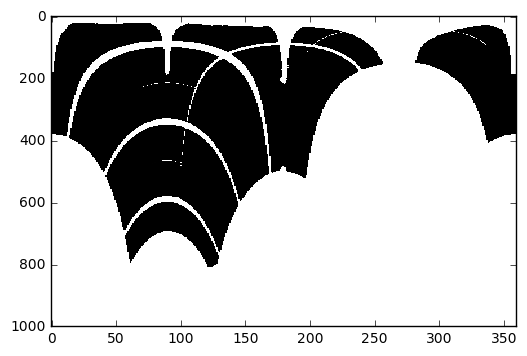

In [28]:
clf();imshow(maskdat)

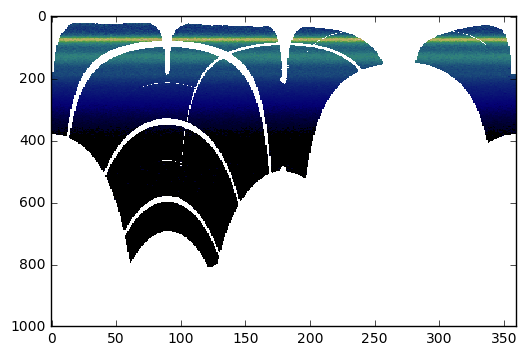

In [29]:
clf();imshow(rphidat)

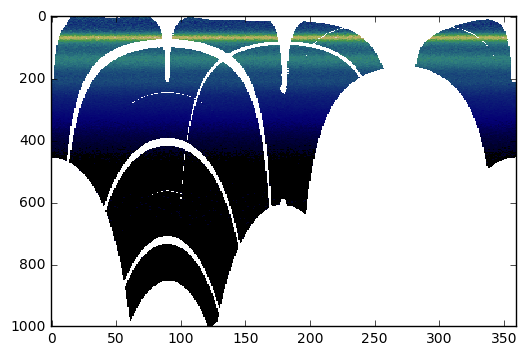

In [30]:
clf();imshow(ref)

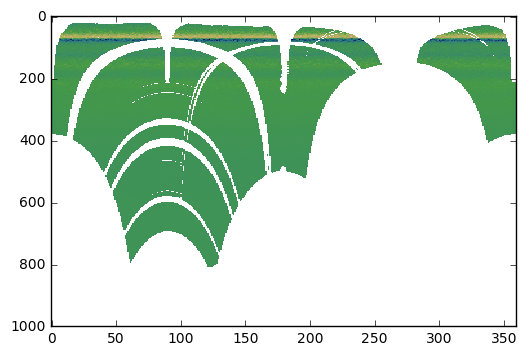

In [31]:
clf();imshow(ref-rphidat)

In [32]:
# the arrays agrgee perfectly, there are some nan values, maybe the mask is dividing these by zero
# need to check later
w = np.where(~np.isnan(ref))

#std dev of diff between two
chisqr = np.sum(np.abs(ref[w]-rphidat[w])**2)
print("difference is {}".format(chisqr))

difference is nan


In [33]:
# check that regions where is nan is same in both, roughly

w_nanref = np.where(np.isnan(ref))
w_nanrphidat = np.where(np.isnan(rphidat))

#the have the same values
print(len(w_nanref[0]))
print(len(w_nanrphidat[0]))

199922
233608
